## Topic: Clustering

### Devising a House Improvement Plan for a Hotel Complex in Mallorca

<i>Business Intelligence &amp; Decision Support, FS2019 (I.BA_BIDS.F1901)</i><br><br>
gwendolin.wilke@hslu.ch

#### Group:
- Markus Kaufmann
- Joel Salzmann
- Larissa Schuler
- Pascal Stalder
- Emanuel Strehler

#### Task:
Your data refers to a questionnaire among customers of a hotel complex in Mallorca that consists of 30
separate houses. In each of the houses customers were asked to give feedback on several aspects of the
house and its service quality. Your data set contains for each house the percentage of positive answers
per question. The goal of the hotel management is to improve the customer ratings of the hotel
complex. Your task is to explore the data to find out which aspects and which houses are most
problematic, so that the management can set priorities.

#### Data Set Description:
_Name:_ questionnaire.csv<br>
_Attributes:_ They refer to the questions in the questionnaire and are measured in **% of positive answers**.
<br>

| Attribute | Description |
| ----------- | ------------- |
| **value** | Overall value for money |
| **complaint** | Handling of customer complaints |
| **facilities** | Bathroom |
| **clean** | Cleanliness |
| **athm** | Positive atmosphere |
| **service** | Service quality (reception, maid service, restaurant) |
| **amenities** | TV, WLAN, parking, minibar, dining, pool, fitness room |



#### Assignment:
1. Load the data set and view it using the _View()_ command.
2. Discuss the dataset based on _str()_ and _summary()_. What does it tell you about the houses?
<br>(I.e., what are the most problematic aspects (attributes) the management should focus on?)
3. Apply K-Means with 4 clusters.
4. Evaluate your clustering results using the evaluation measures discussed in class. Interpret them.
5. Interpret your clustering results:
    - What is the biggest, what is the smallest cluster?
    - Inspect the coordinates of the cluster means (i.e. the cluster centers) and interpret them:
        - What are the groups of houses the management should focus on, and why? 
        - For each group of houses, what are the most problematic aspects?
    - Estimate the average percentage of positive answers per cluster (average over the attribute
        values of each cluster center-point) to get an overall performance KPI for each cluster of houses.
        Which cluster has the best performance on average?
6. Try some other values for the number of clusters (instead of 4). Write down the resulting
_withinss_ values and draw the respective graph. What do you observe? Are 4 clusters a good
choice?

<hr>

### Required libraries

In [1]:
if (!require("DT")) install.packages("DT")
library("DT")

Loading required package: DT
Warning message:
"package 'DT' was built under R version 3.5.3"

In [2]:
if (!require("factoextra")) install.packages("factoextra")
library(factoextra)

Loading required package: factoextra
Warning message:
"package 'factoextra' was built under R version 3.5.3"Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


### Methodology

### 1. Load the data set and view it.

In [24]:
dataSurvey <- read.csv(file = '../Assignment/questionnaire.csv', header = TRUE, sep = ",")
datatable(dataSurvey)

HTML widgets cannot be represented in plain text (need html)

<br>

### 2. Discuss the dataset based on _str()_ and _summary()_. What does it tell you about the houses?

#### i.e. what are the most problematic aspects (attributes) the management should focus on?

In [4]:
str(dataSurvey, list.len=ncol(dataSurvey))

'data.frame':	30 obs. of  7 variables:
 $ value     : int  43 63 71 61 81 43 58 71 72 67 ...
 $ complaint : int  51 64 70 63 78 55 67 75 82 61 ...
 $ facilities: int  30 51 68 45 56 49 42 50 72 45 ...
 $ clean     : int  39 54 69 47 66 44 56 55 67 47 ...
 $ athm      : int  61 63 76 54 71 54 66 70 71 62 ...
 $ service   : int  92 73 86 84 83 49 68 66 83 80 ...
 $ amenities : int  45 47 48 35 47 34 35 41 31 41 ...


In [5]:
summary(dataSurvey)

     value         complaint      facilities        clean            athm      
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    service        amenities    
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

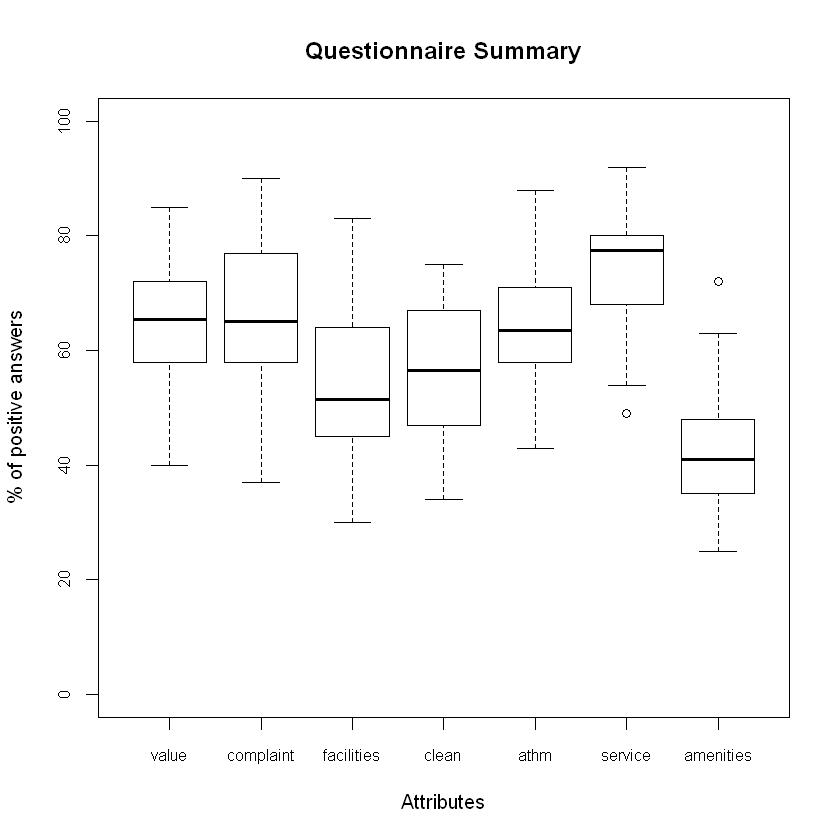

In [6]:
par(cex.axis=0.8)
boxplot(x = as.list(dataSurvey), main = "Questionnaire Summary", 
        xlab = "Attributes", ylab = "% of positive answers", ylim = c(0, 100))

In [7]:
for (i in colnames(dataSurvey)) {
    print(i, quote=FALSE)
    idx_min <- which.min(dataSurvey[[i]])
    idx_max <- which.max(dataSurvey[[i]])
    print(sprintf("index house with lowest: %d (%d%%)", idx_min, dataSurvey[idx_min, which(colnames(dataSurvey)==i)]), quote=FALSE)
    print(sprintf("index house with highest: %d (%d%%)", idx_max, dataSurvey[idx_max, which(colnames(dataSurvey)==i)]), quote=FALSE)
}

[1] value
[1] index house with lowest: 24 (40%)
[1] index house with highest: 29 (85%)
[1] complaint
[1] index house with lowest: 24 (37%)
[1] index house with highest: 16 (90%)
[1] facilities
[1] index house with lowest: 1 (30%)
[1] index house with highest: 14 (83%)
[1] clean
[1] index house with lowest: 21 (34%)
[1] index house with highest: 18 (75%)
[1] athm
[1] index house with lowest: 21 (43%)
[1] index house with highest: 26 (88%)
[1] service
[1] index house with lowest: 6 (49%)
[1] index house with highest: 1 (92%)
[1] amenities
[1] index house with lowest: 13 (25%)
[1] index house with highest: 26 (72%)


#### Analyse:
Der obigen Datenanalyse sind folgende Kernpunkte zu entnehmen: 
- Das Attribut ***amenities*** (Annehmlichkeiten) erzielt die **tiefsten** Zufriedenheitswerte: <br>Somit ist dies einer der Punkte, welcher - aus Sicht des Managements - genauer analysiert werden muss. 
- Das Attribut ***service*** erzielt die **höchsten** Zufriedenheitswerte: <br>Mehr als die Hälfte der Befragten scheinen bei 70% der Häuser mit der _service quality_ zufrieden zu sein.

**Outlier:**
- _service_: Haus Nr. 6 (49%)
- _amenities_: Haus Nr. 26 (72%)

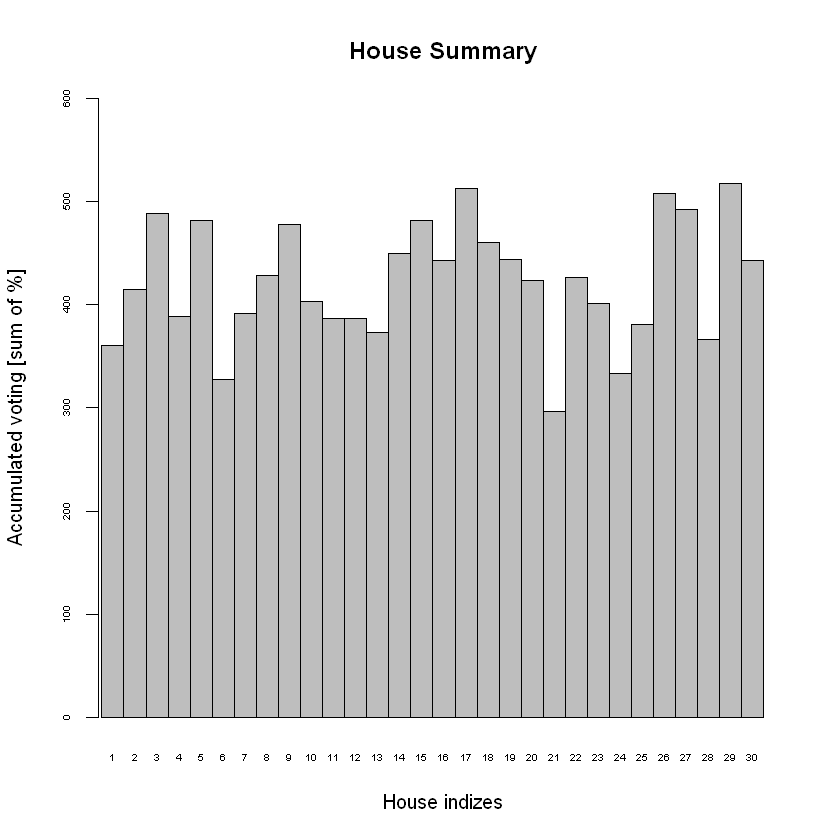

In [8]:
accVoting <- data.frame("house" = seq(1,30,1), "acc_voting" = rowSums(dataSurvey, na.rm = FALSE, dims = 1))

par(cex.axis=0.5)
barplot(accVoting$acc_voting, main = "House Summary", 
        xlab = "House indizes", ylab = "Accumulated voting [sum of %]",
        xlim = c(1, 30), ylim = c(0, 600), names.arg=rownames(accVoting), space = 0)

In [9]:
house_ranking <- data.frame(accVoting)
house_ranking <- house_ranking[rev(order(house_ranking$acc_voting)),]
rownames(house_ranking) <- NULL
print(house_ranking)

   house acc_voting
1     29        518
2     17        513
3     26        508
4     27        492
5      3        488
6     15        482
7      5        482
8      9        478
9     18        460
10    14        450
11    19        444
12    30        443
13    16        443
14     8        428
15    22        426
16    20        424
17     2        415
18    10        403
19    23        401
20     7        392
21     4        389
22    12        387
23    11        387
24    25        381
25    13        373
26    28        366
27     1        361
28    24        333
29     6        328
30    21        297


#### Analyse von Korrelationen

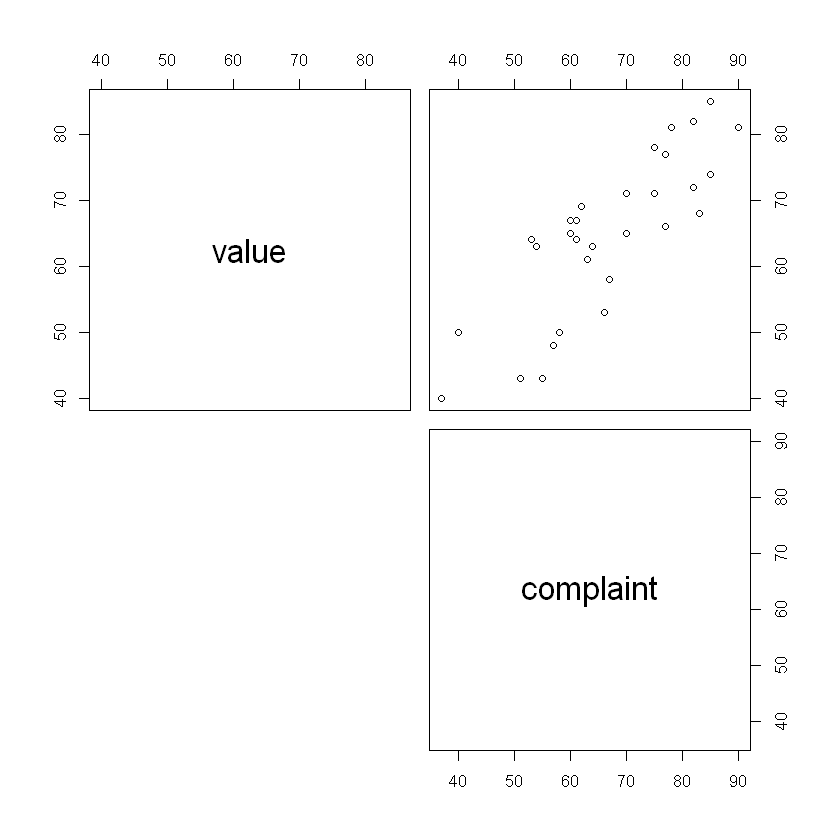

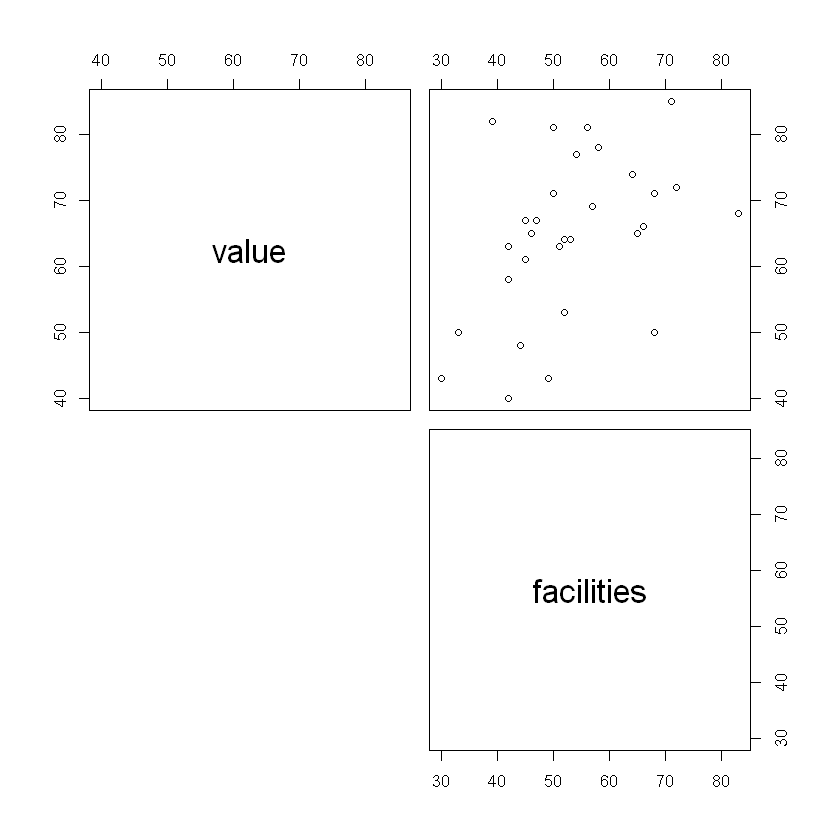

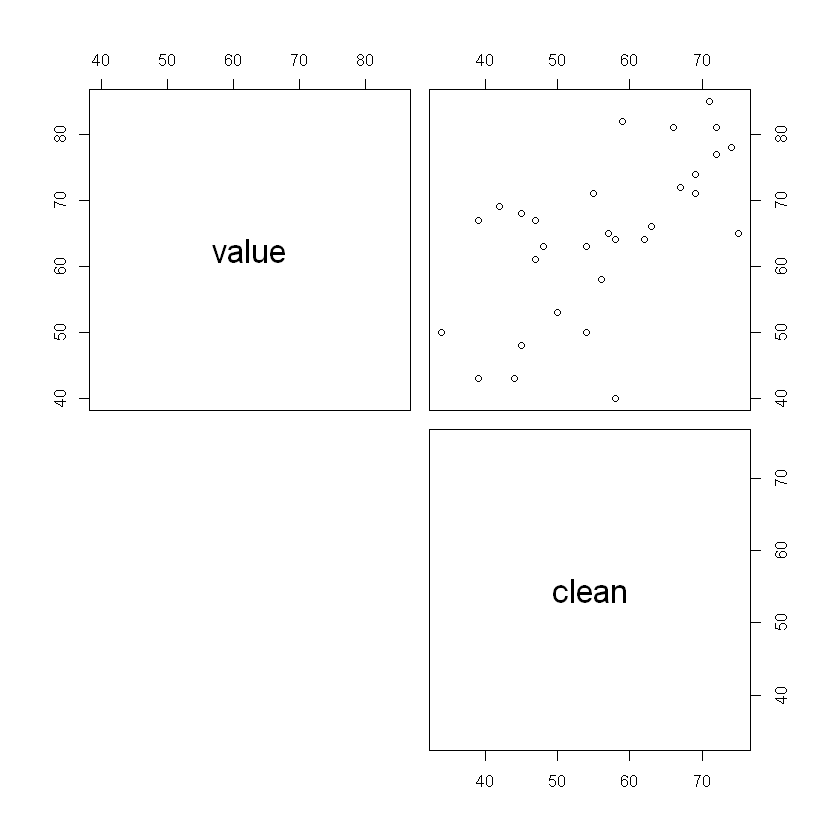

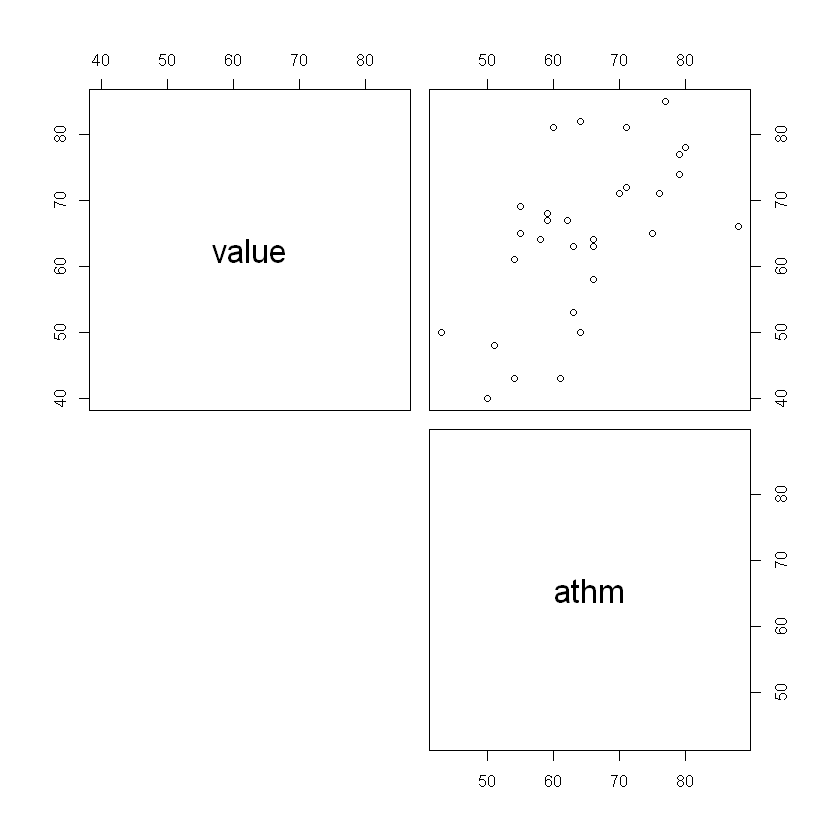

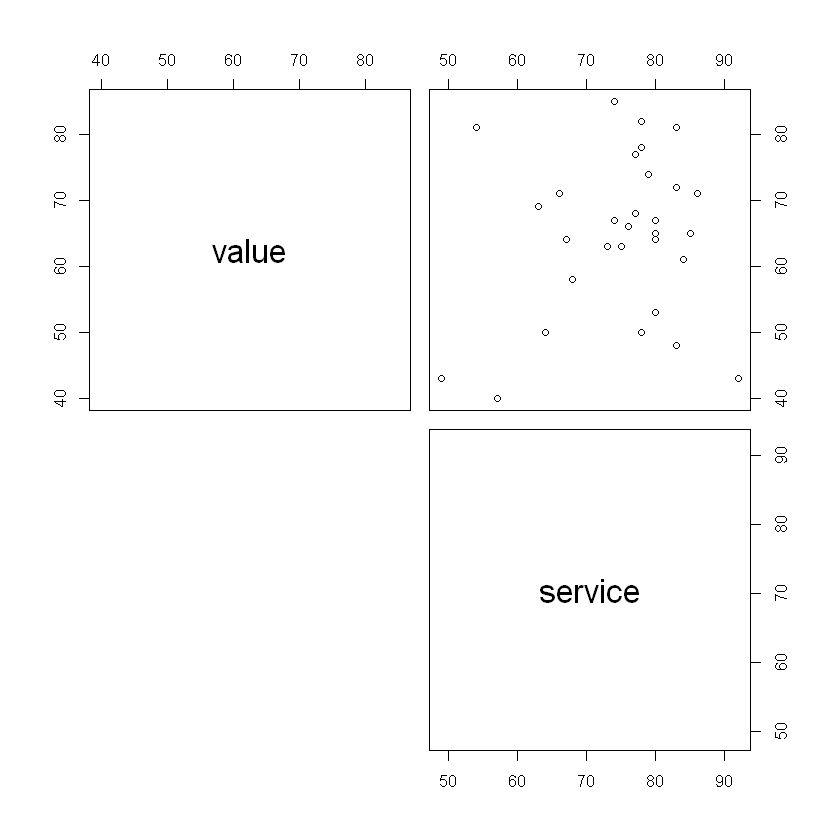

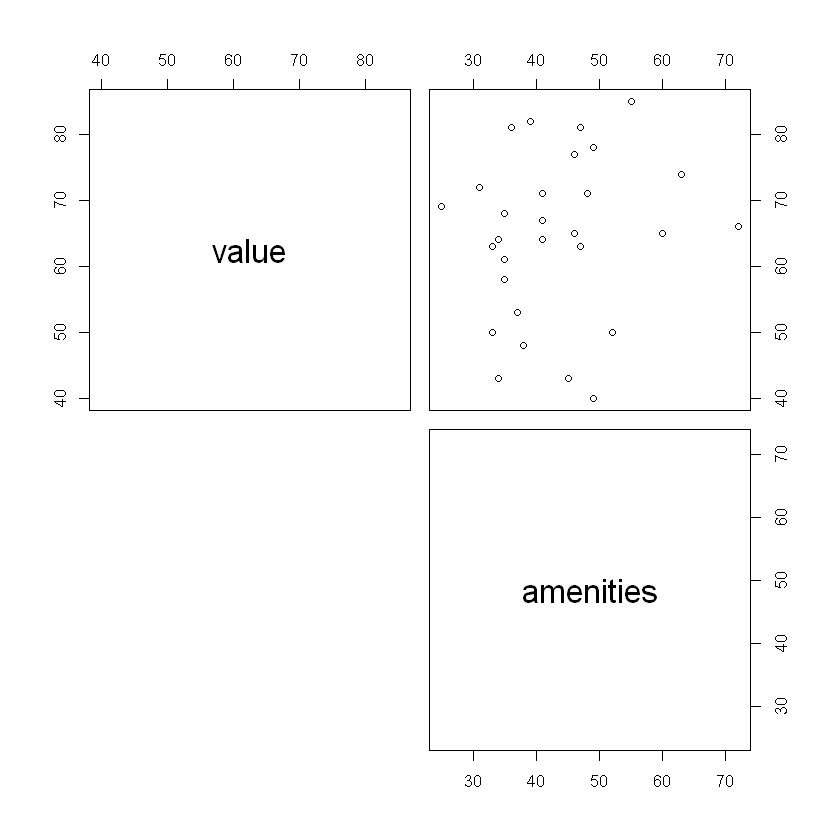

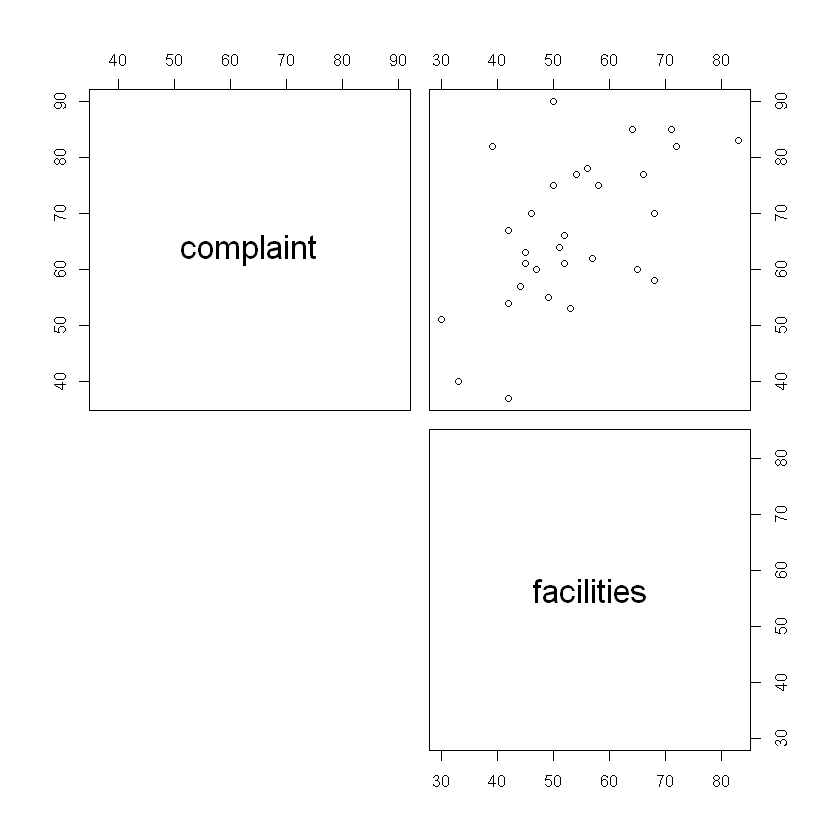

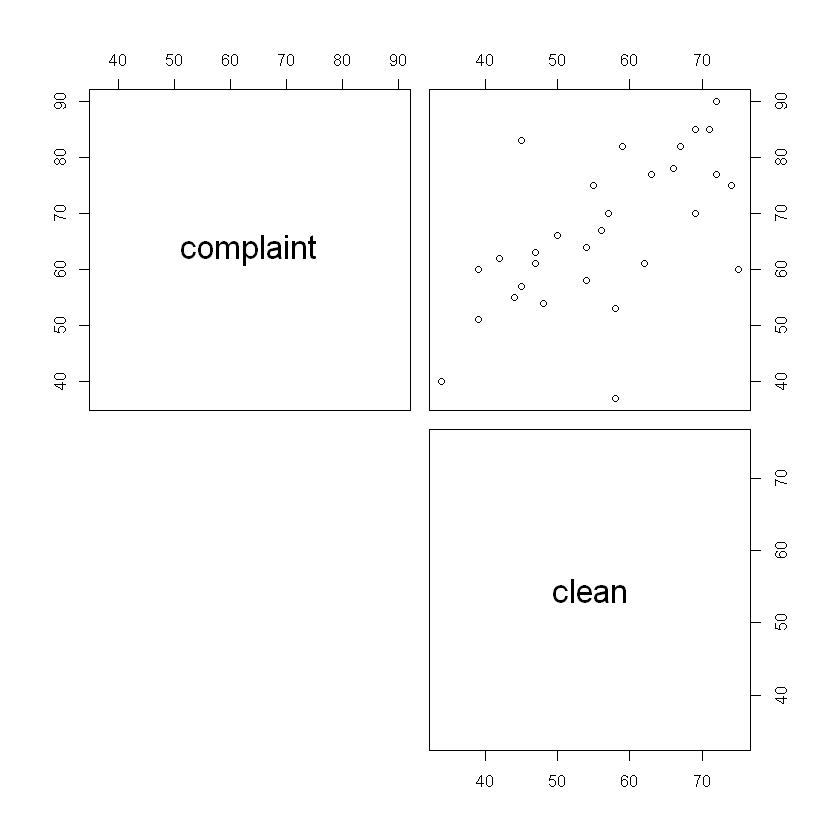

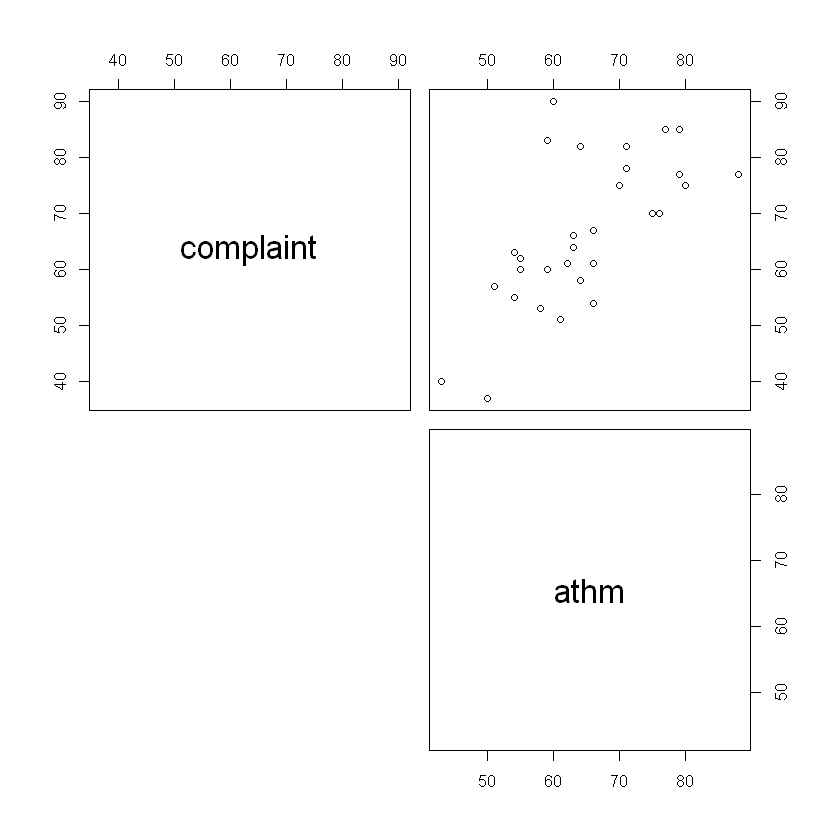

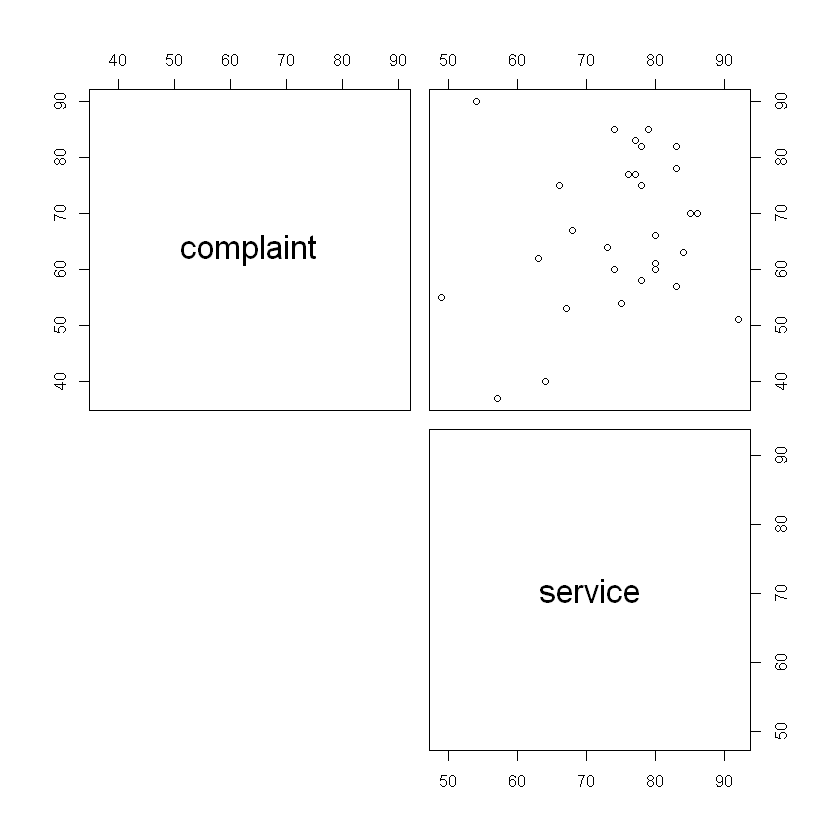

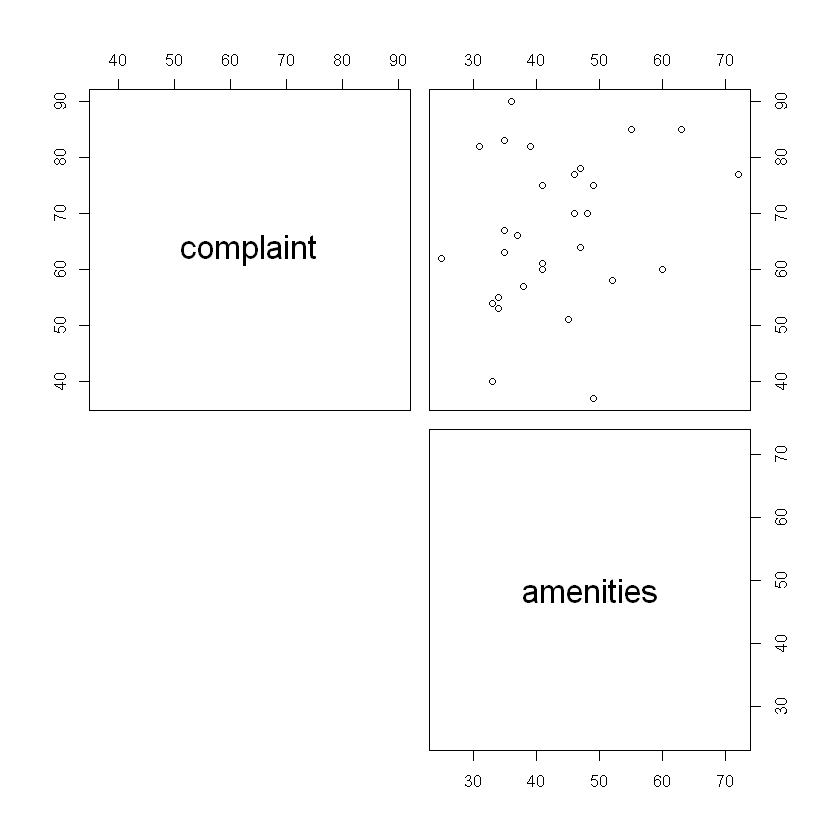

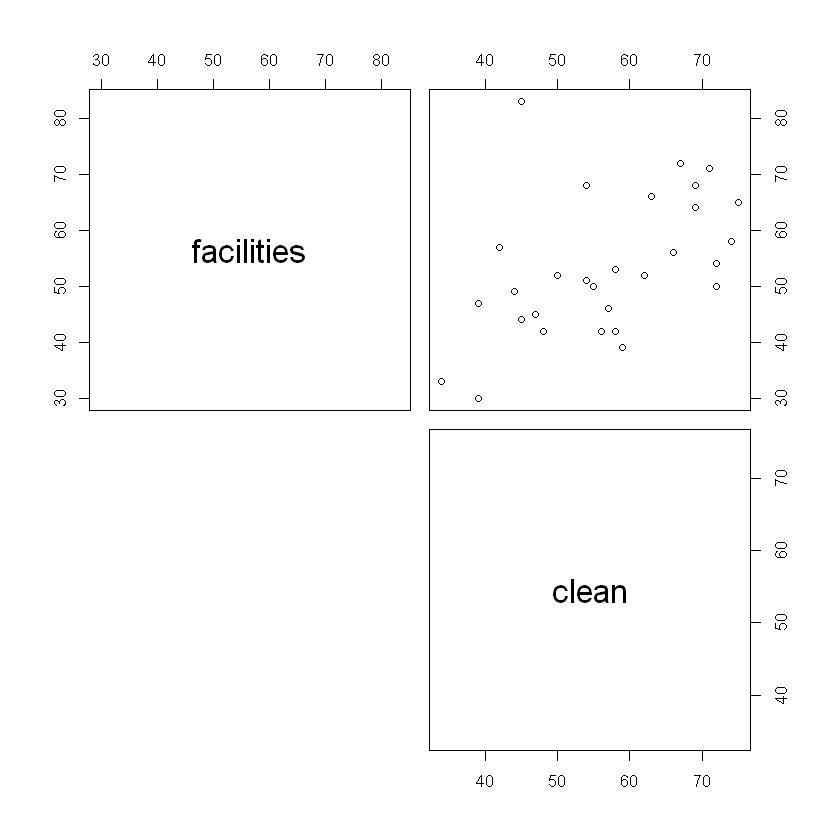

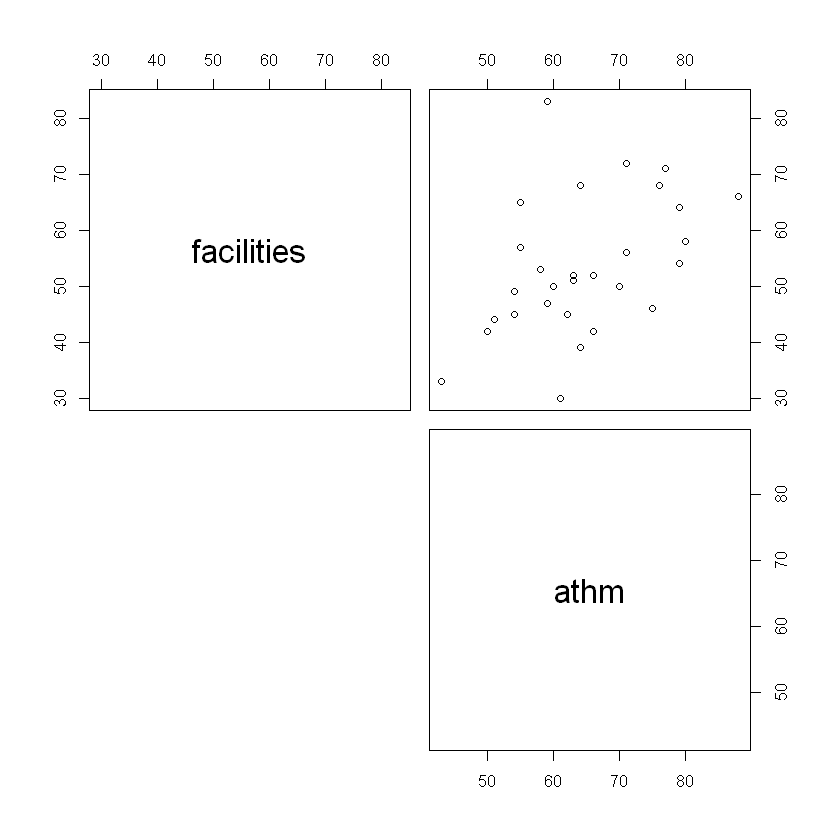

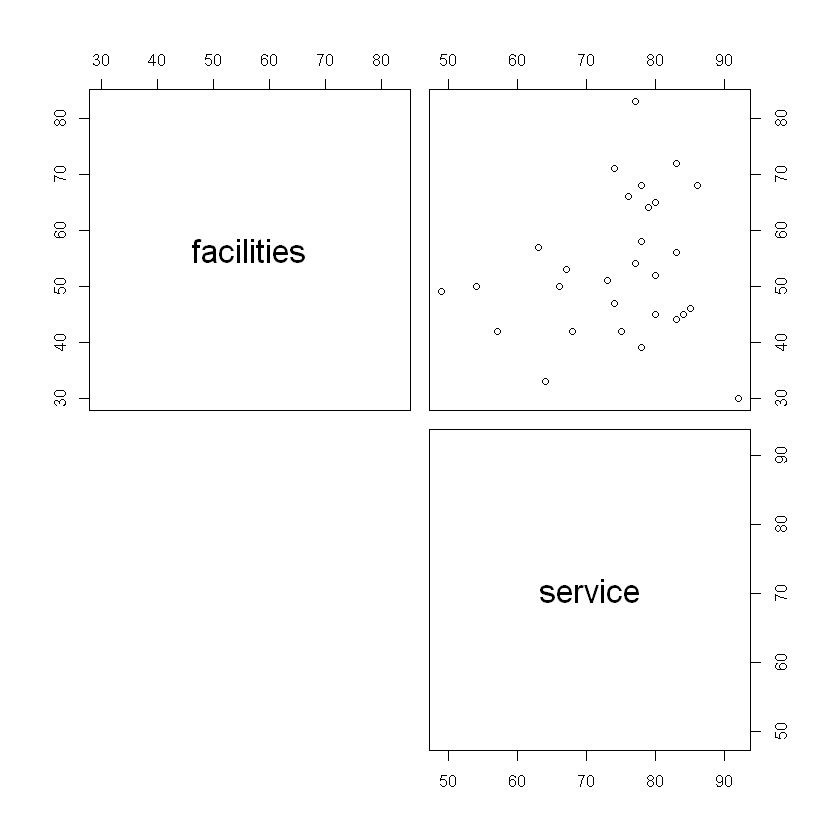

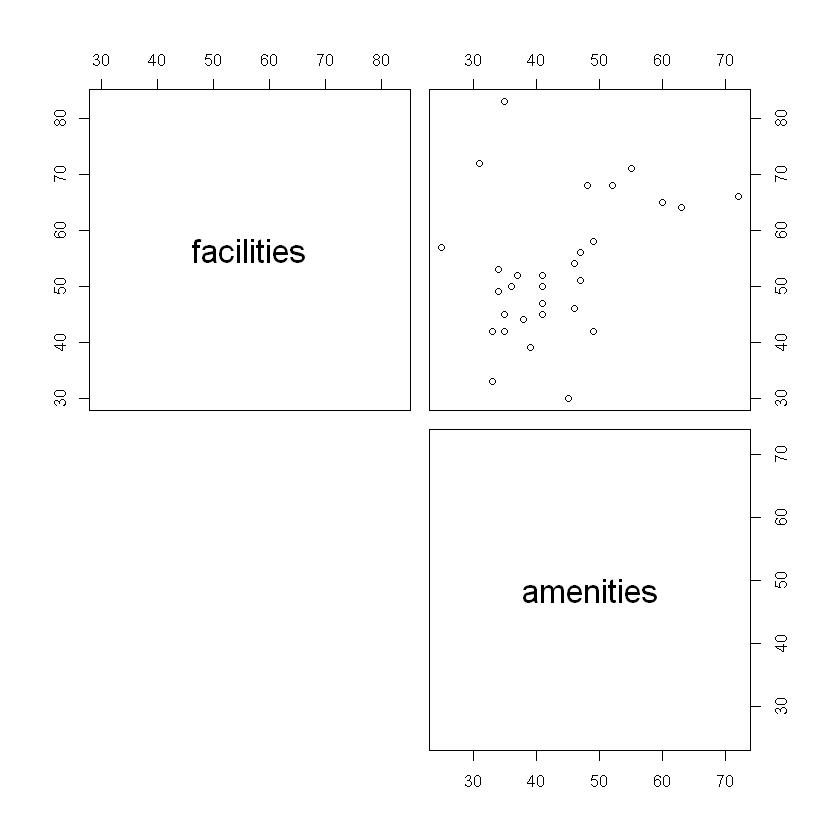

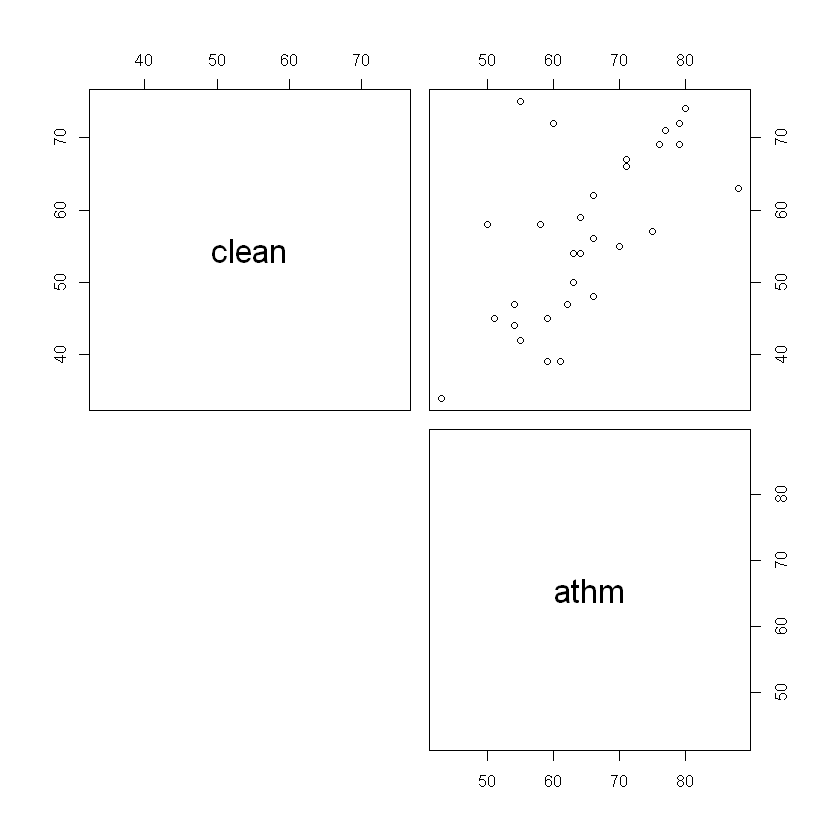

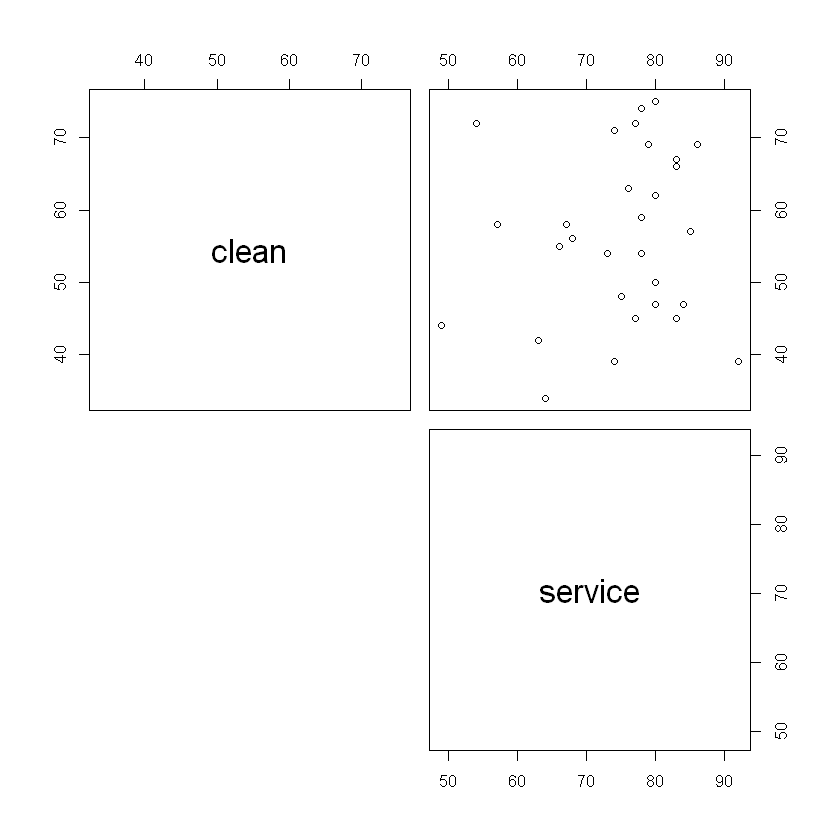

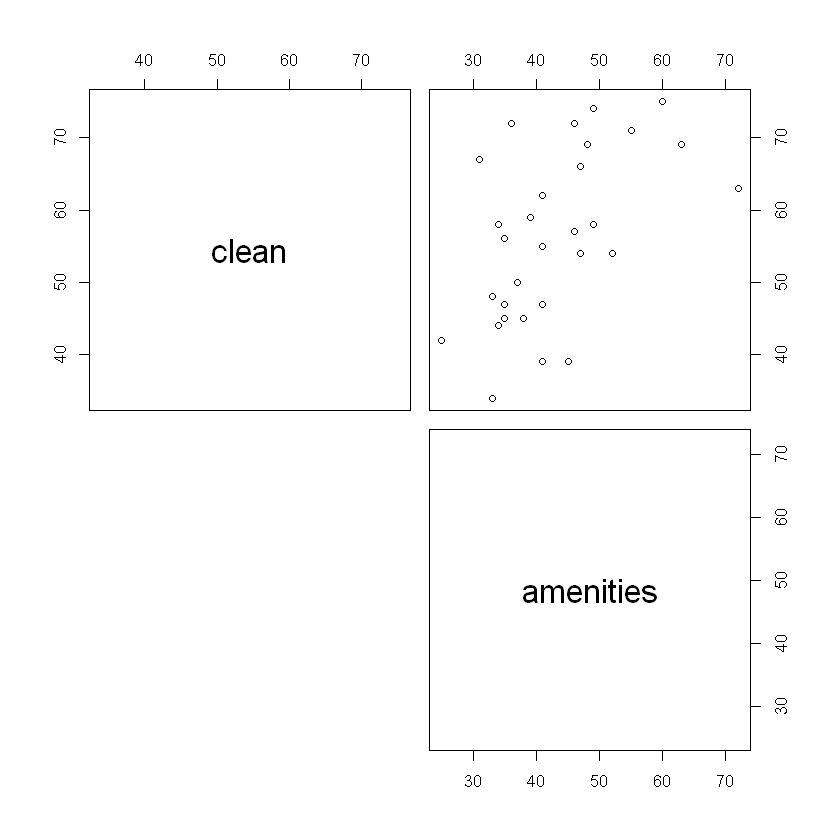

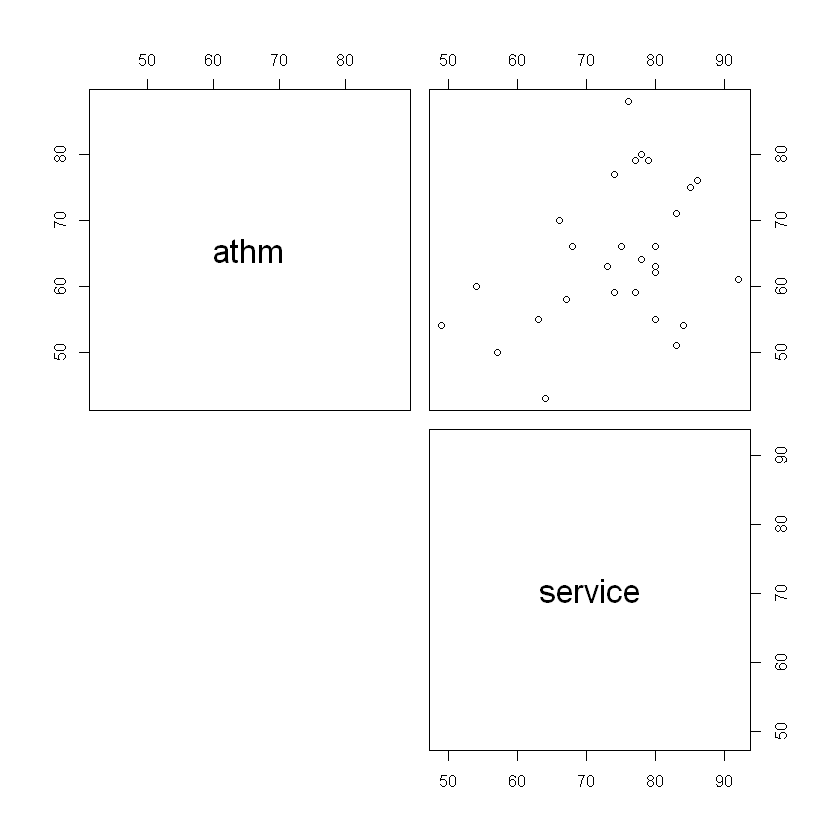

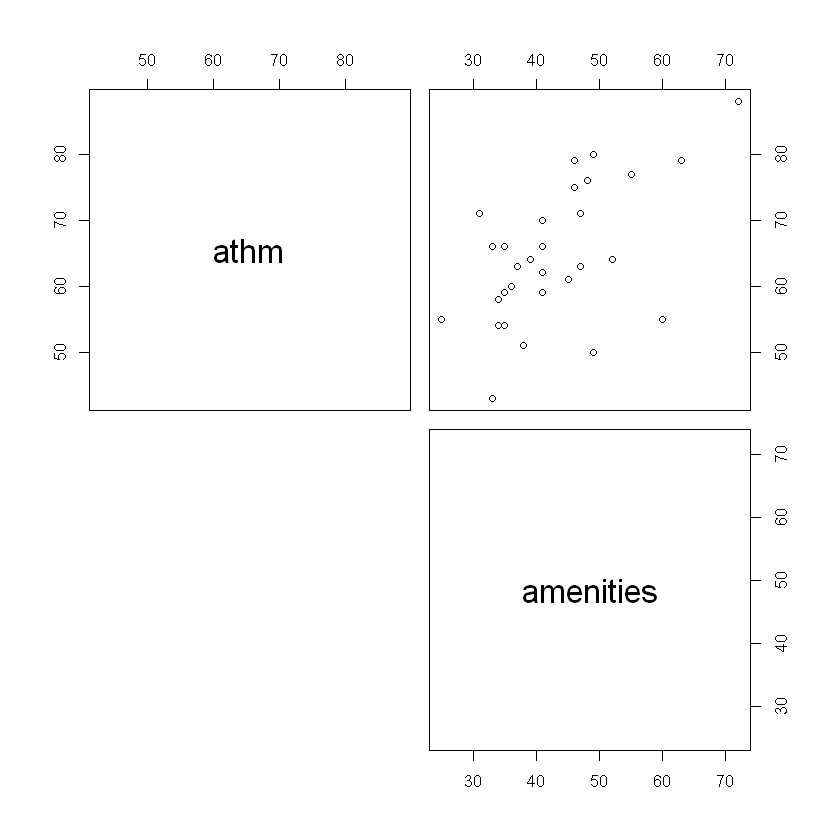

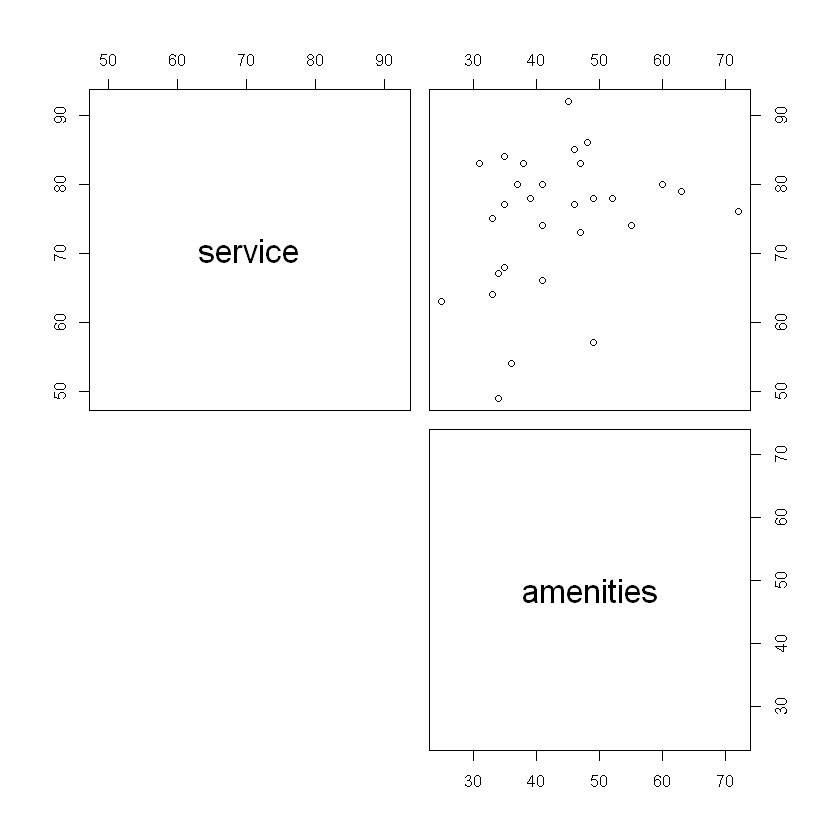

In [10]:
n_cols <- ncol(dataSurvey)
for(i in 1:n_cols) {
    for(j in i:n_cols) {
        if(j == n_cols) {
            break
        }
        pairs(dataSurvey[,c(i, j + 1)], lower.panel = NULL)
    }
}

<br>

Allgemein sind keine signifikanten Merkmale betreffend der Korrelation jeweiliger Attributpaare zu erkennen.<br><br>
Am ehesten erkennbar ist eine positive Korrelation beim Vergleich der Attribute **value** und **complaint**: <br>
Je besser auftretende Kundenanfragen / -beschwerden von der Liegenschaftsverwaltung behandelt / gelöst wurden, desto positiver wurde das Preis-Leistungs-Verhältnis der betroffenen Liegenschaft bewertet.

<br>

### 3. Apply K-Means with 4 clusters.

In [11]:
set.seed(1)

k <- 4
clusters <- kmeans(dataSurvey, k, nstart = 50, iter.max = 20)
clusters

K-means clustering with 4 clusters of sizes 3, 14, 8, 5

Cluster means:
     value complaint facilities    clean     athm  service amenities
1 44.33333    44.000   41.33333 45.33333 49.00000 56.66667  38.66667
2 59.64286    60.500   48.14286 49.85714 61.64286 77.28571  39.28571
3 74.62500    75.875   62.75000 69.87500 75.62500 79.12500  55.00000
4 74.80000    82.400   58.80000 59.60000 64.80000 71.60000  36.40000

Clustering vector:
 [1] 2 2 3 2 3 1 2 4 4 2 2 2 2 4 3 4 3 3 2 2 1 2 2 1 2 3 3 2 3 4

Within cluster sum of squares by cluster:
[1]  993.3333 4801.0714 2533.8750 2745.2000
 (between_SS / total_SS =  58.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

#### Cluster centers

In [12]:
clusters$centers

value,complaint,facilities,clean,athm,service,amenities
44.33333,44.000,41.33333,45.33333,49.00000,56.66667,38.66667
59.64286,60.500,48.14286,49.85714,61.64286,77.28571,39.28571
74.62500,75.875,62.75000,69.87500,75.62500,79.12500,55.00000
74.80000,82.400,58.80000,59.60000,64.80000,71.60000,36.40000


#### Cluster dimensions

In [13]:
clusters$size

[1]  3 14  8  5

#### Principal Component Analysis (PCA)

Importance of components:
                           PC1     PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     22.7990 11.5819 9.8521 9.23251 6.40426 5.07354 4.66844
Proportion of Variance  0.5621  0.1451 0.1050 0.09217 0.04435 0.02783 0.02357
Cumulative Proportion   0.5621  0.7071 0.8121 0.90425 0.94860 0.97643 1.00000

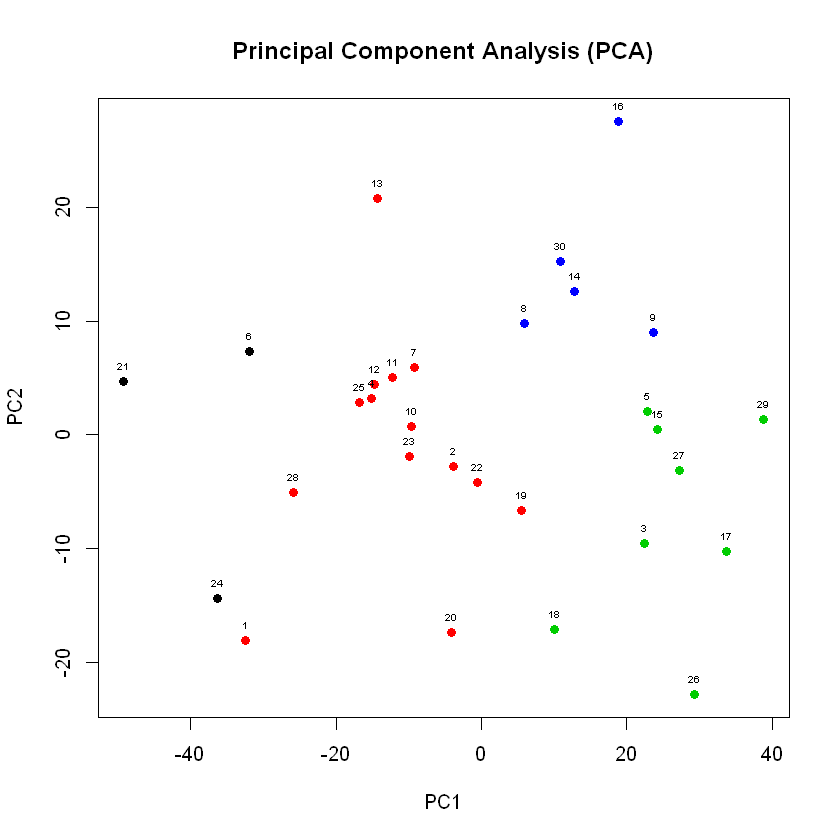

In [14]:
pca <- prcomp(dataSurvey)
summary(pca)
plot(pca$x, main="Principal Component Analysis (PCA)", pch=19, col=clusters$cluster)
text(pca$x, labels=rownames(dataSurvey), cex=0.5, pos=3)

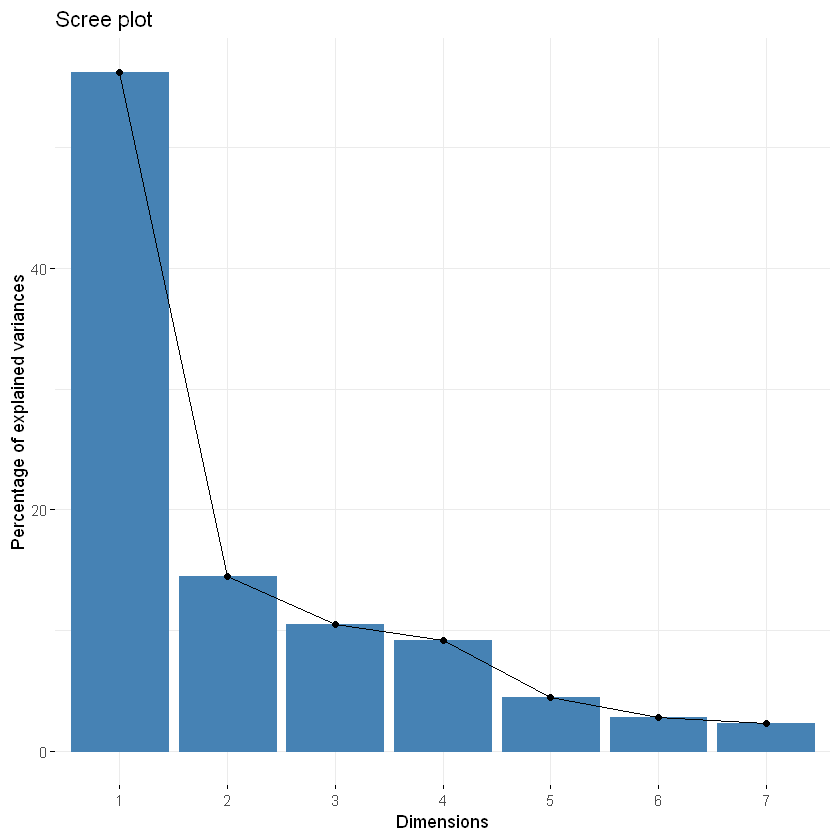

In [15]:
fviz_eig(pca)

Die Reduktion der ursprünglichen 7 Dimensionen auf deren 2 via Principal Component Analysis (PCA) impliziert eine Gesamtvarianz von ca. 70% (0.5621 + 0.1451, siehe _Proportion of Variance_ innerhalb des obigen PCA-Summaries).<br>
Dies bedeutet, dass durch die Reduktion von 7 auf 2 Dimensionen immer noch rund 70% der essentiellen Datenvarianz abgedeckt ist.

#### Cluster visualization (k = 4)

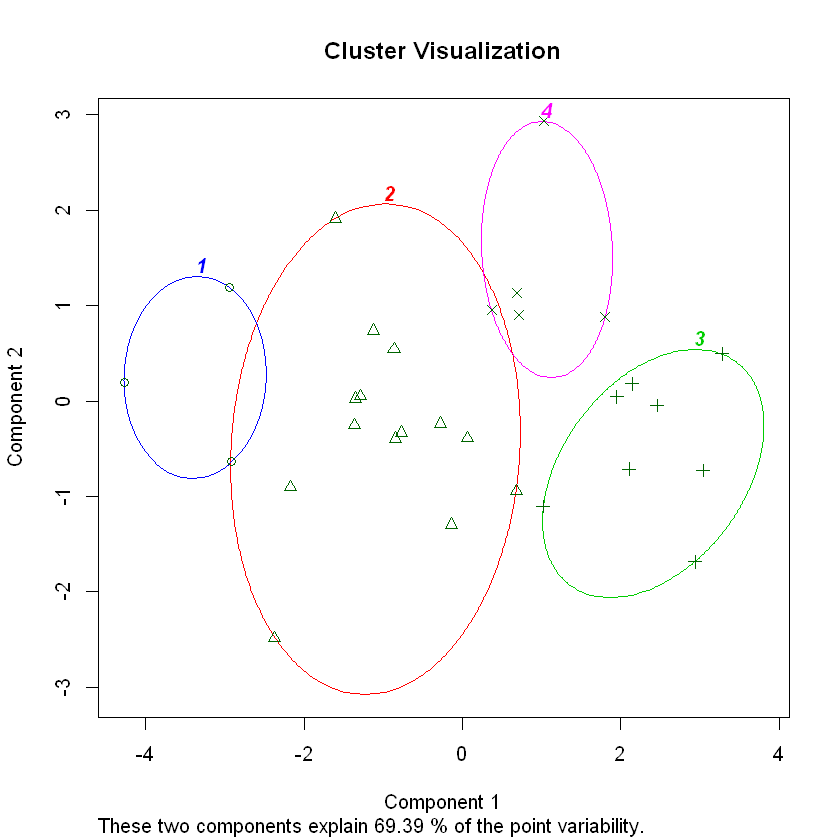

In [16]:
library(cluster)

clusplot(dataSurvey, clusters$cluster, color=TRUE, shade=FALSE, 
           labels=4, lines=0, main = 'Cluster Visualization')

In [17]:
cluster_vector <- clusters$cluster
houses_in_cluster <- data.frame(matrix(ncol = 2, nrow = 0))

for(i in (1:length(cluster_vector))) {
    houses_in_cluster <- rbind(houses_in_cluster, list(cluster_vector[i], i))
}

colnames(houses_in_cluster) <- c("cluster", "house")

for(i in (1:k)) {
    cluster_houses <- houses_in_cluster[houses_in_cluster$cluster == i, "house"]
    print(paste("cluster: ", i, sep = ""), quote=FALSE)
    print("houses: ", quote=FALSE)
    for(j in 1:length(cluster_houses)) {
        cluster_house <- cluster_houses[j]
        rank <- which(house_ranking$house == cluster_house)
        print(paste(cluster_house, " (", rank, ".)", sep = ""), quote=FALSE)
    }
}

[1] cluster: 1
[1] houses: 
[1] 6 (29.)
[1] 21 (30.)
[1] 24 (28.)
[1] cluster: 2
[1] houses: 
[1] 1 (27.)
[1] 2 (17.)
[1] 4 (21.)
[1] 7 (20.)
[1] 10 (18.)
[1] 11 (23.)
[1] 12 (22.)
[1] 13 (25.)
[1] 19 (11.)
[1] 20 (16.)
[1] 22 (15.)
[1] 23 (19.)
[1] 25 (24.)
[1] 28 (26.)
[1] cluster: 3
[1] houses: 
[1] 3 (5.)
[1] 5 (7.)
[1] 15 (6.)
[1] 17 (2.)
[1] 18 (9.)
[1] 26 (3.)
[1] 27 (4.)
[1] 29 (1.)
[1] cluster: 4
[1] houses: 
[1] 8 (14.)
[1] 9 (8.)
[1] 14 (10.)
[1] 16 (13.)
[1] 30 (12.)


#### Analysis: Metrics for varying cluster centers (k)

In [18]:
c_metrics <- data.frame(matrix(ncol = 5, nrow = 0))

k_min <- 1
k_max <- 15

for(i in (k_min:k_max)) {
    c <- kmeans(dataSurvey, i, nstart = 50, iter.max = 20)
    c_metrics <- rbind(c_metrics, list(i, round(c$totss, 4), 
                                           round(c$betweenss, 4), 
                                           round(c$tot.withinss, 4), round(c$betweenss/c$totss, 4)))
}

colnames(c_metrics) <- c("k", "totalss", "betweenss", "total.withinss", "ratio")
print(c_metrics)

    k totalss betweenss total.withinss  ratio
1   1 26818.8      0.00      26818.800 0.0000
2   2 26818.8  10996.26      15822.545 0.4100
3   3 26818.8  13677.34      13141.464 0.5100
4   4 26818.8  15745.32      11073.480 0.5871
5   5 26818.8  17304.85       9513.946 0.6453
6   6 26818.8  18633.09       8185.708 0.6948
7   7 26818.8  19893.00       6925.799 0.7418
8   8 26818.8  20669.77       6149.033 0.7707
9   9 26818.8  21345.13       5473.667 0.7959
10 10 26818.8  21896.97       4921.833 0.8165
11 11 26818.8  22445.88       4372.917 0.8369
12 12 26818.8  22887.38       3931.417 0.8534
13 13 26818.8  23342.60       3476.200 0.8704
14 14 26818.8  23733.10       3085.700 0.8849
15 15 26818.8  24074.33       2744.467 0.8977


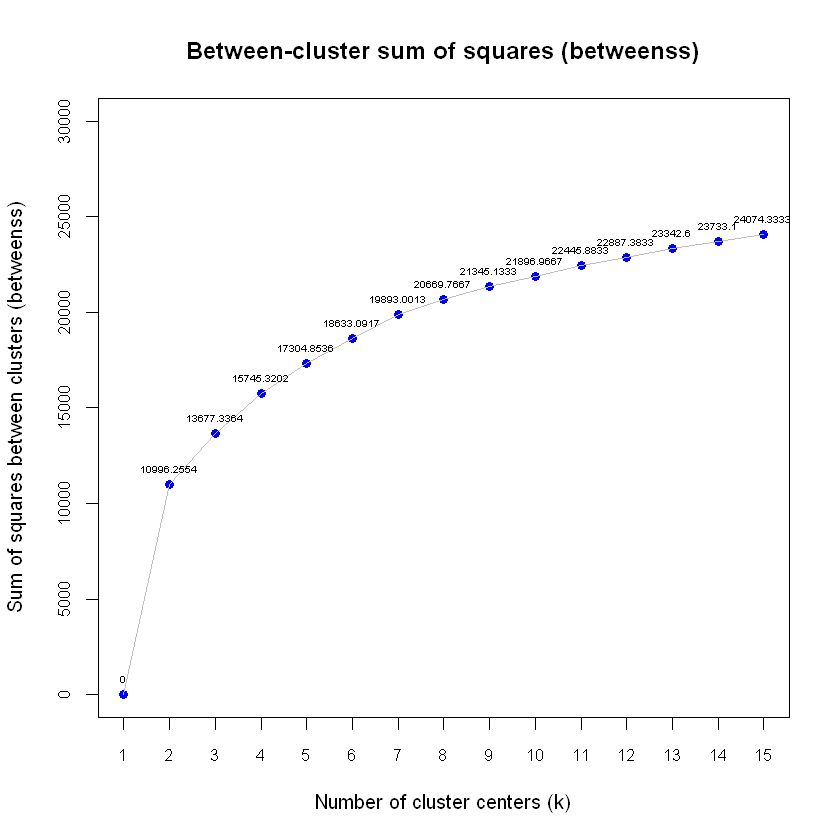

In [19]:
par(cex.axis=0.8)
plot(c_metrics$k, c_metrics$betweenss, main = "Between-cluster sum of squares (betweenss)", 
     xlim = c(k_min, k_max), ylim = c(0, 30000), 
     xlab = "Number of cluster centers (k)", ylab = "Sum of squares between clusters (betweenss)", col = "blue", pch=19)
lines(c_metrics$k, c_metrics$betweenss, xlim = c(k_min, k_max), ylim = c(0, 30000), col = "grey")
text(c_metrics$k, c_metrics$betweenss, labels=c_metrics$betweenss, cex= 0.5, pos=3)
axis(1, at=seq(k_min, k_max, 1))

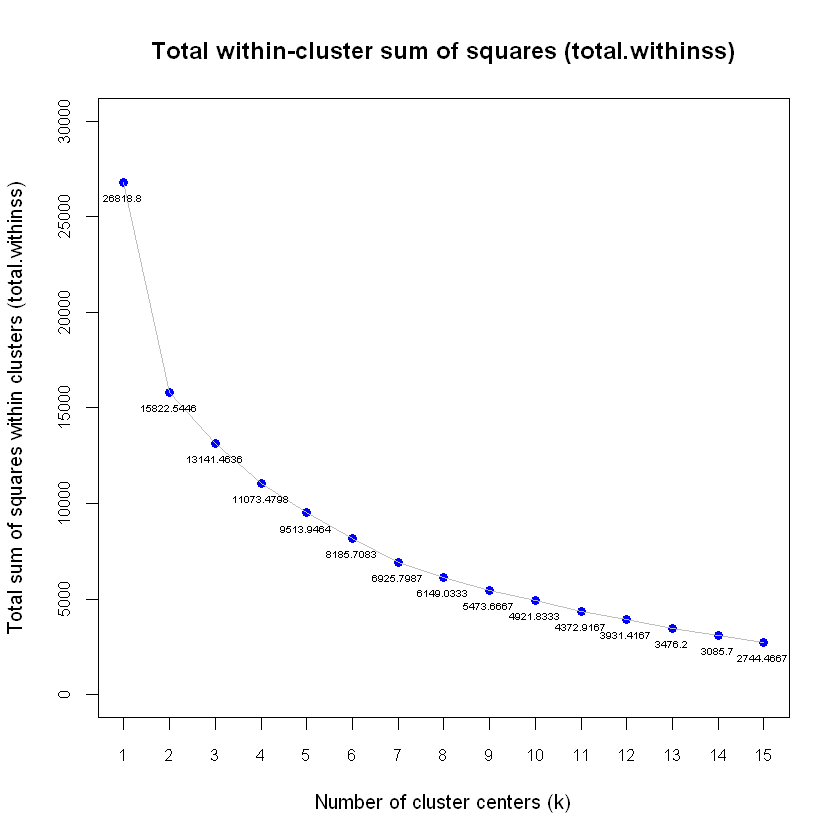

In [20]:
par(cex.axis=0.8)
plot(c_metrics$k, c_metrics$total.withinss, main = "Total within-cluster sum of squares (total.withinss)", 
     xlim = c(k_min, k_max), ylim = c(0, 30000), 
     xlab = "Number of cluster centers (k)", ylab = "Total sum of squares within clusters (total.withinss)", 
     col = "blue", pch=19)
lines(c_metrics$k, c_metrics$total.withinss, xlim = c(k_min, k_max), ylim = c(0, 30000), col = "grey")
text(c_metrics$k, c_metrics$total.withinss, labels=c_metrics$total.withinss, cex= 0.5, pos=1)
axis(1, at=seq(k_min, k_max, 1))

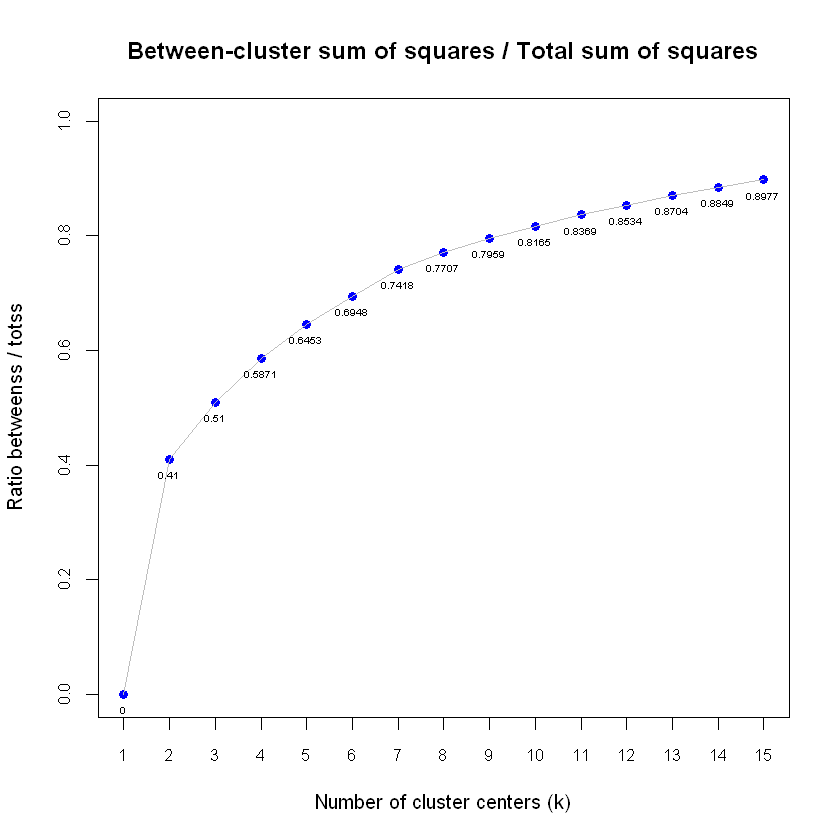

In [21]:
par(cex.axis=0.8)
plot(c_metrics$k, c_metrics$ratio, main = "Between-cluster sum of squares / Total sum of squares", 
     xlim = c(k_min, k_max), ylim = c(0, 1), 
     xlab = "Number of cluster centers (k)", ylab = "Ratio betweenss / totss", 
     col = "blue", pch=19)
lines(c_metrics$k, c_metrics$ratio, xlim = c(k_min, k_max), ylim = c(0, 1), col = "grey")
text(c_metrics$k, c_metrics$ratio, labels=c_metrics$ratio, cex= 0.5, pos=1)
axis(1, at=seq(k_min, k_max, 1))

#### Elbow method: Find optimal number of cluster centers (k)

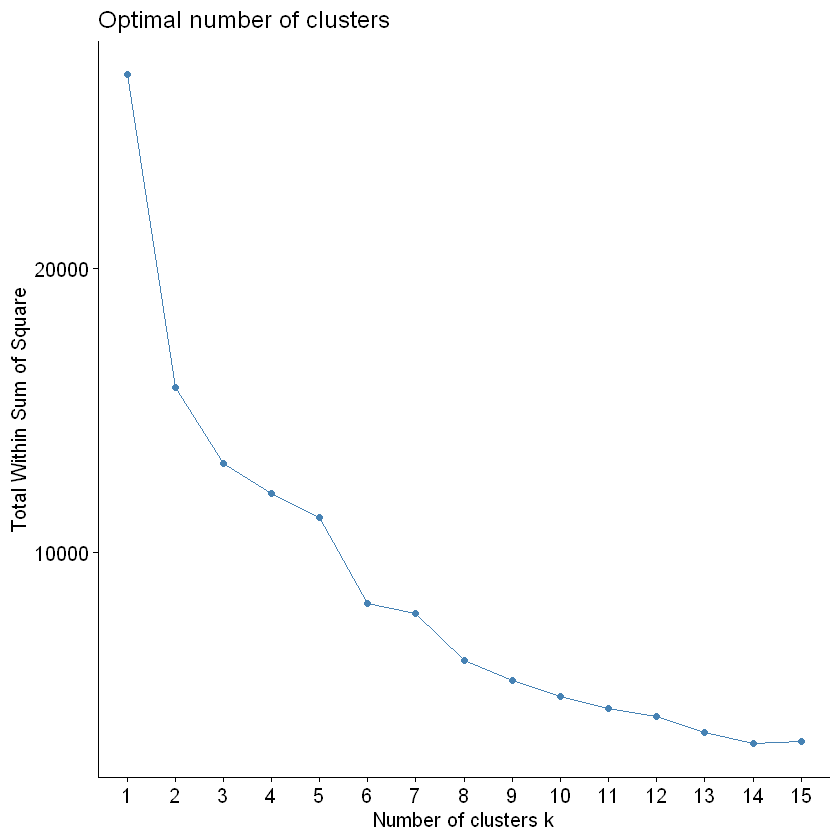

In [22]:
fviz_nbclust(dataSurvey, kmeans, method = "wss", k.max = k_max)

Den zuvor kalkulierten Metriken sowie der obigen Darstellung ist zu entnehmen, dass die optimale Anzahl an Cluster-Zentren im Bereich von k={3,6} (incl.) liegen muss.

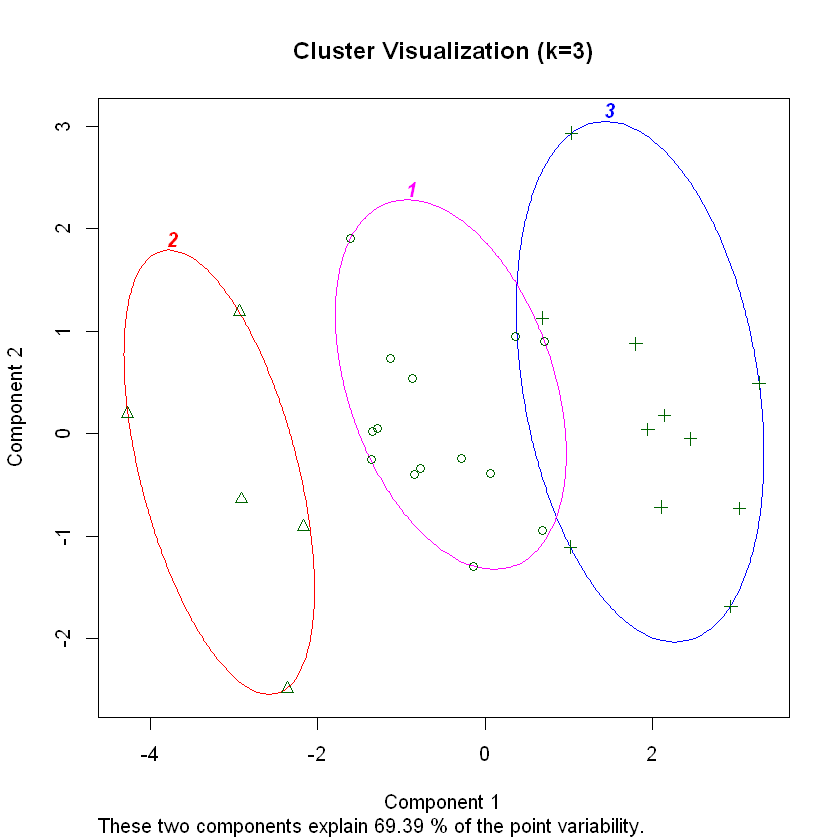

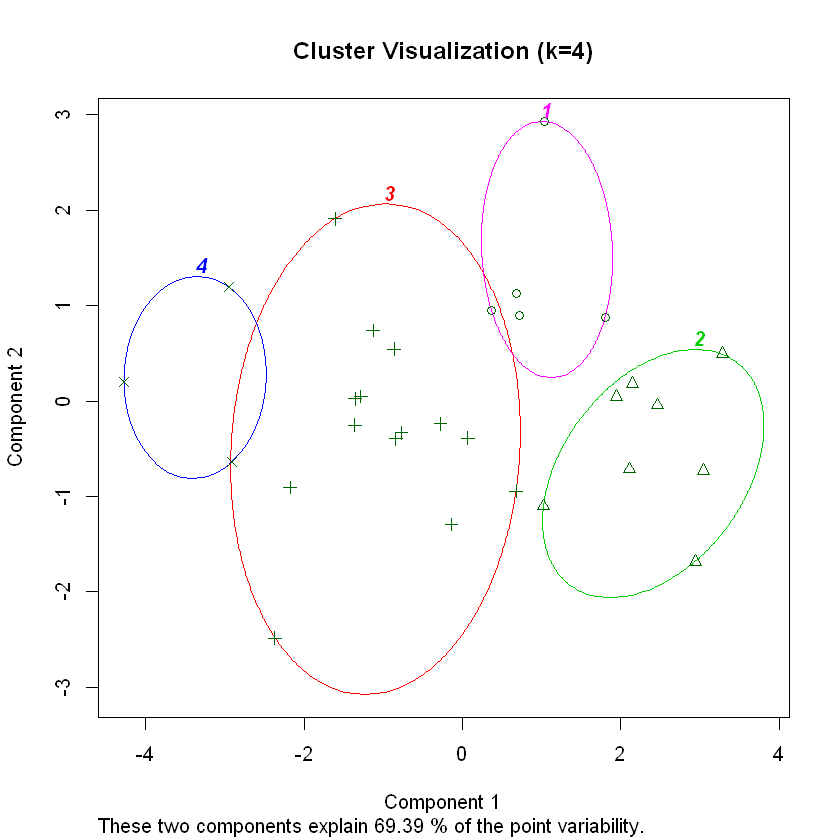

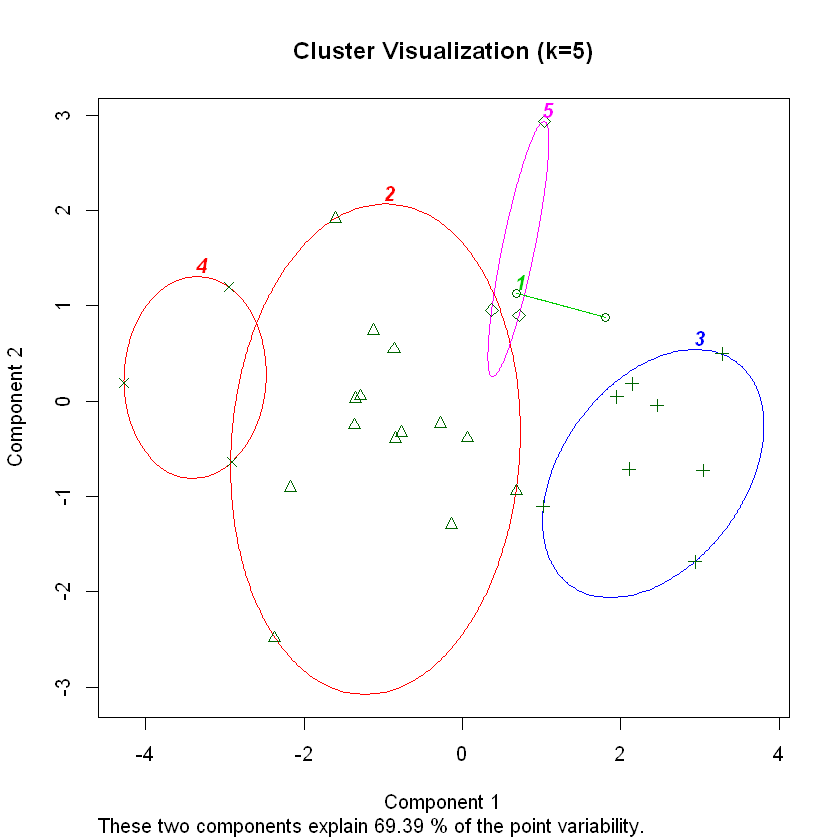

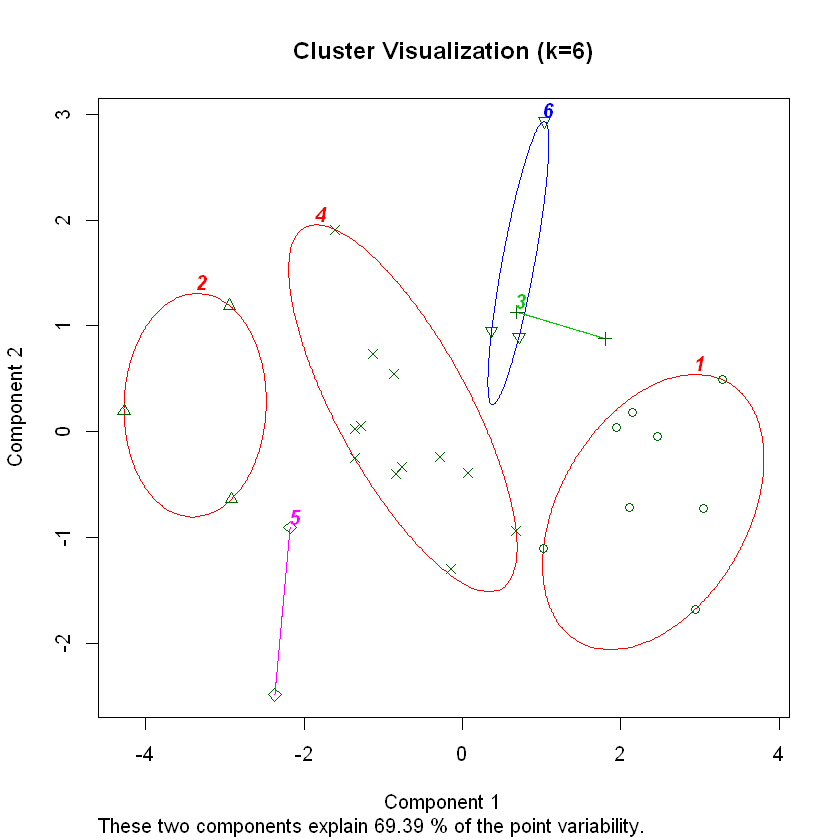

In [23]:
library(cluster)

set.seed(1)

for(k_opt in (3:6)) {
    cluster_opt <- kmeans(dataSurvey, k_opt, nstart = 50, iter.max = 20)
    summary(cluster_opt)
    clusplot(dataSurvey, cluster_opt$cluster, color=TRUE, shade=FALSE, 
               labels=4, lines=0, main = paste("Cluster Visualization (k=", k_opt, ")", sep = ""))
}